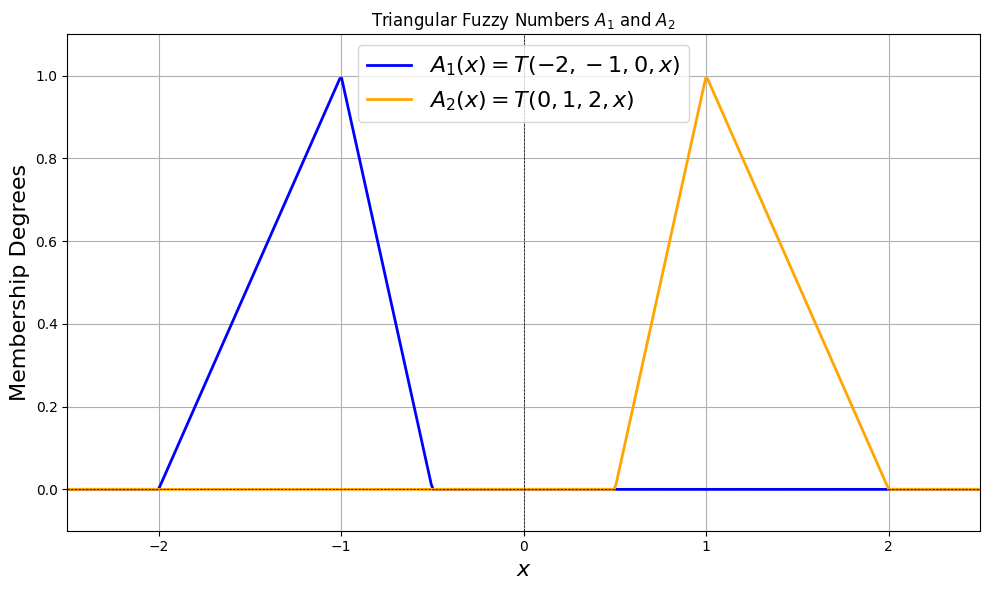

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import LowerUpperFunctions as luf

# Define the fuzzy sets A1 and A2
def A1(x):
    return luf.triangular_fuzzy_number(-2, -1, -0.5, x)

def A2(x):
    return luf.triangular_fuzzy_number(0.5, 1, 2, x)

# Generate x values for plotting
x_values = np.linspace(-2.5, 2.5, 500)
A1_values = np.array([A1(x) for x in x_values])
A2_values = np.array([A2(x) for x in x_values])

# Plotting the fuzzy sets
plt.figure(figsize=(10, 6))
plt.plot(x_values, A1_values, label='$A_1(x) = T(-2,-1,0,x)$', color='blue', linewidth=2)
plt.plot(x_values, A2_values, label='$A_2(x) = T(0,1,2,x)$', color='orange', linewidth=2)
plt.title('Triangular Fuzzy Numbers $A_1$ and $A_2$')
plt.xlabel('$x$',fontsize=16)
plt.ylabel('Membership Degrees',fontsize=16)
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid()
plt.legend(fontsize=16)
plt.xlim(-2.5, 2.5)
plt.ylim(-0.1, 1.1)
plt.tight_layout()
plt.savefig("TFS.pdf",format='pdf')
plt.show()

    

In [4]:
import numpy as np

# Define the function f(x)
def f(x):
    return x ** 2

# Define the fuzzy sets A1 and A2 again
def A1(x):
    return luf.triangular_fuzzy_number(-2, -1, -0.5, x)

def A2(x):
    return luf.triangular_fuzzy_number(1, 0, 1, x)

def A3(x):
    return luf.triangular_fuzzy_number(0.5, 1, 2, x)

# Define the domain for A1 and A2
x_values_A1 = np.linspace(-2, 0, 500)
x_values_A2 = np.linspace(-1, 1, 500)
x_values_A3 = np.linspace(0, 2, 500)
# Compute the ratios for A1
ratios_A1 = np.array([f(x) / A1(x) if A1(x) > 0 else np.inf for x in x_values_A1])
# Compute the ratios for A2
ratios_A2 = np.array([f(x) / A2(x) if A2(x) > 0 else np.inf for x in x_values_A2])
# Compute the ratios for A2
ratios_A3 = np.array([f(x) / A3(x) if A3(x) > 0 else np.inf for x in x_values_A3])

# Compute F_A^\downarrow
F_A1_down = np.min(ratios_A1)
F_A2_down = np.min(ratios_A2)
F_A3_down = np.min(ratios_A3)

F_A1_down, F_A2_down, F_A3_down


(np.float64(1.0000040322092878),
 np.float64(4.024112481991659e-06),
 np.float64(1.0000040322092878))

In [5]:
# Compute the products for A1
products_A1 = np.array([A1(x) * f(x) for x in x_values_A1])

# Compute the products for A2
products_A2 = np.array([A2(x) * f(x) for x in x_values_A2])
# Compute the products for A3
products_A3 = np.array([A3(x) * f(x) for x in x_values_A3])

# Compute F_A^\uparrow
F_A1_up = np.max(products_A1)
F_A2_up = np.max(products_A2)
F_A3_up = np.max(products_A3)

F_A1_up, F_A2_up, F_A3_up


(np.float64(1.185181612979977),
 np.float64(0.14814770162249713),
 np.float64(1.185181612979977))

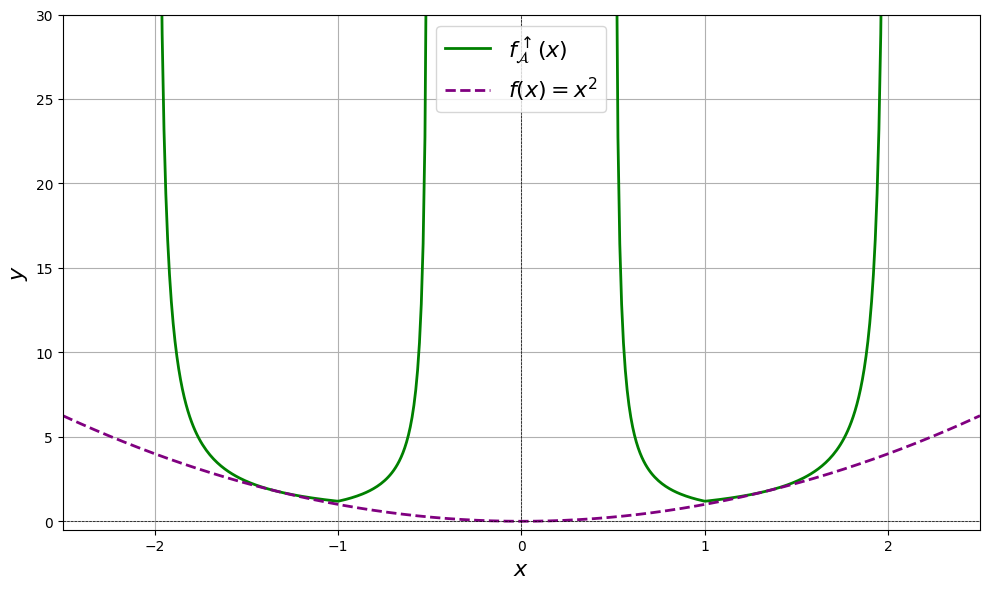

In [11]:
# Define the inverse upward transformation function
def f_A_upExperiment(x):
    # Compute the ratios for both A1 and A2
    ratio_A1 = F_A1_up / A1(x) if A1(x) > 0 else np.inf
    ratio_A2 = F_A2_up / A2(x) if A2(x) > 0 else np.inf
    ratio_A3 = F_A3_up / A3(x) if A3(x) > 0 else np.inf
    # Return the minimum of the two ratios
    return min(ratio_A1, ratio_A3)

# Generate x values for plotting the inverse upward transformation
x_values = np.linspace(-2.5, 2.5, 500)
f_A_up_values = np.array([f_A_upExperiment(x) for x in x_values])
f_values = f(x_values)

# Plotting f_A^\uparrow and f(x)
plt.figure(figsize=(10, 6))
plt.plot(x_values, f_A_up_values, label='$f_{\\mathcal{A}}^{\\uparrow}(x)$', color='green', linewidth=2)
plt.plot(x_values, f_values, label='$f(x) = x^2$', color='purple', linewidth=2, ls='--')

#plt.title('Inverse Upward Transformation and Original Function')
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$y$',fontsize=16)
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid()
plt.legend(fontsize=16)
plt.xlim(-2.5, 2.5)
plt.ylim(-0.5, 30)
plt.tight_layout()
plt.savefig("UF1.pdf",format='pdf')
plt.show()


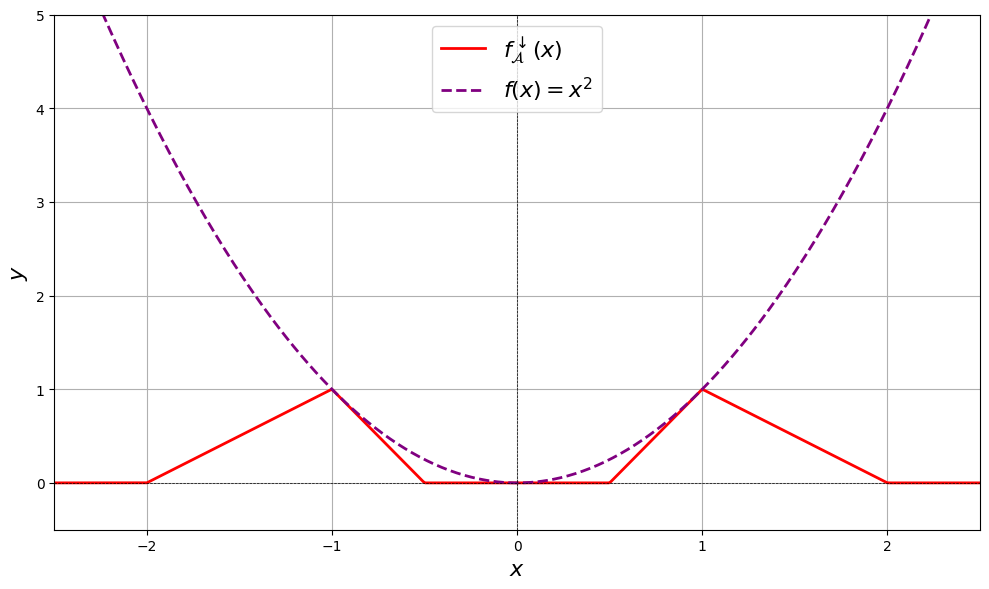

In [12]:
# Define the inverse downward transformation function
def f_A_downExperiment(x):
    # Calculate A(x) * F_A^\downarrow for both A1 and A2
    value_A1 = A1(x) * F_A1_down
    value_A3 = A3(x) * F_A3_down
    # Return the maximum of the two values
    return max(value_A1, value_A3)

# Generate x values for plotting the inverse downward transformation
f_A_down_values = np.array([f_A_downExperiment(x) for x in x_values])

# Plotting f_A^\downarrow and f(x)
plt.figure(figsize=(10, 6))
plt.plot(x_values, f_A_down_values, label='$f_{\\mathcal{A}}^{\\downarrow}(x)$', color='red', linewidth=2)
plt.plot(x_values, f_values, label='$f(x) = x^2$', color='purple', linewidth=2, ls='--')
#plt.title('Inverse Downward Transformation and Original Function')
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$y$',fontsize=16)
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid()
plt.legend(fontsize=16)
plt.xlim(-2.5, 2.5)
plt.ylim(-0.5, 5)
plt.tight_layout()
plt.savefig("DF1.pdf",format='pdf')

plt.show()


[1.185147397094984, 0.9949899799599198, 1.185147397094984]


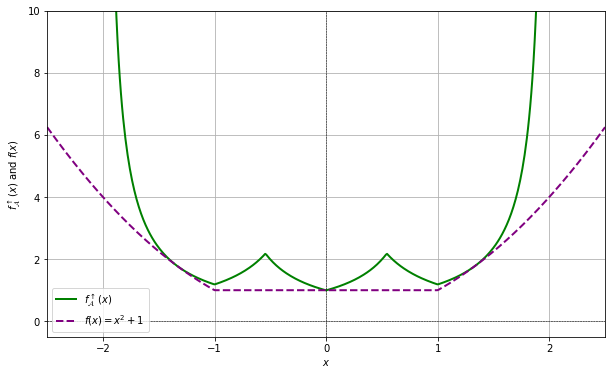

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


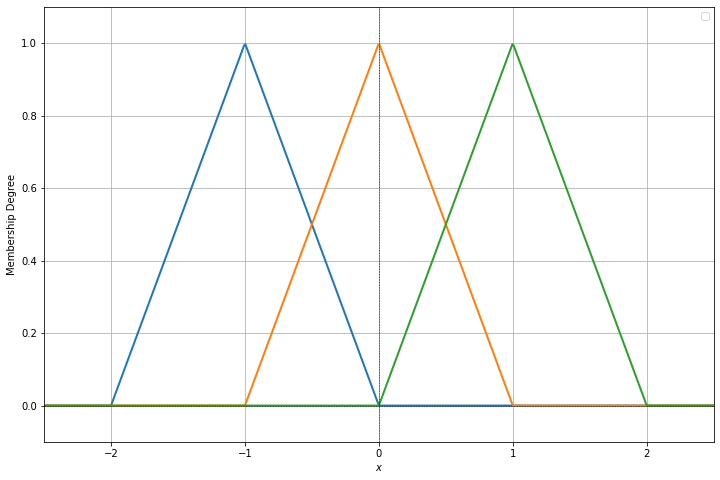

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) with noise
def f(x, noise_level=0.1):
#    noise = np.random.normal(0, noise_level, size=x.shape)  # Add Gaussian noise
#    return x ** 2 + 1+noise
    return np.maximum(x ** 2-1,0)+1 

# Number of triangular fuzzy sets
a=-2
n = 3  # Change this value as needed
k = 1 # The distance between parameters

# Precompute the parameters for triangular fuzzy sets
params = [( a+ (i - 1) * k, a + i * k, a + (i + 1) * k) for i in range(1, n + 1)]

# Compute F_A^\uparrow for each triangular fuzzy set
F_A_up = []

# Define the domain of x for plotting
x_values = np.linspace(-2.5, 2.5, 500)
f_values = f(x_values)

for a, b, c in params:
    products = np.array([luf.triangular_fuzzy_number(a, b, c, x) * f(x) for x in x_values])
    F_A_up.append(np.max(products))

# Compute f_{\mathcal{A}}^\uparrow
f_A_up_values = np.array([luf.f_A_upT(x,F_A_up,params) for x in x_values])
print(F_A_up)
# Plotting the result
plt.figure(figsize=(10, 6))
plt.plot(x_values, f_A_up_values, label='$f_{\\mathcal{A}}^{\\uparrow}(x)$', color='green', linewidth=2)
plt.plot(x_values, f_values, label='$f(x) = x^2+1$', color='purple', linewidth=2,ls='--')
#plt.title('Generalized Inverse Upward Transformation with Multiple Fuzzy Sets')
plt.xlabel('$x$')
plt.ylabel('$f_{\\mathcal{A}}^{\\uparrow}(x)$ and $f(x)$')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid()
plt.legend()
plt.xlim(-2.5, 2.5)
plt.ylim(-0.5, 10)
plt.show()

# Plotting all fuzzy sets
luf.plot_triangular_fuzzy_sets(params)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) with noise
def f(x, noise_level=0.1):
#    noise = np.random.normal(0, noise_level, size=x.shape)  # Add Gaussian noise
#    return x ** 2 + 1+noise
    return np.maximum(x ** 2-1,0) 

# Number of triangular fuzzy sets
a=-2
n = 3  # Change this value as needed
k = 1  # The distance between parameters

# Precompute the parameters for triangular fuzzy sets
params = [( a + (i - 1) * k, a + i * k, a + (i + 1) * k) for i in range(1, n + 1)]

# Compute F_A^\downarrow for each triangular fuzzy set
F_A_down = []

# Define the domain of x for plotting
x_values = np.linspace(-2.5, 2.5, 500)
f_values = f(x_values)

for a, b, c in params:
    ratios = np.array([f(x) / luf.triangular_fuzzy_number(a, b, c, x) if luf.triangular_fuzzy_number(a, b, c, x) > 0 else np.inf for x in np.linspace(a, b, 500)])
    F_A_down.append(np.min(ratios))


# Compute f_{\mathcal{A}}^\downarrow
f_A_down_values = np.array([luf.f_A_downT(x) for x in x_values])

# Plotting the result
plt.figure(figsize=(10, 6))
plt.plot(x_values, f_A_down_values, label='$f_{\\mathcal{A}}^{\\downarrow}(x)$', color='red', linewidth=2)
plt.plot(x_values, f_values, label='$f(x)$', color='purple', linewidth=2, ls='--')
#plt.title('Generalized Inverse Downward Transformation with Multiple Fuzzy Sets')
plt.xlabel('$x$')
plt.ylabel('$f_{\\mathcal{A}}^{\\downarrow}(x)$ and $f(x)$')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid()
plt.legend()
plt.xlim(-2.5, 2.5)
plt.ylim(-0.5, 5)
plt.show()

# Plotting all fuzzy sets
luf.plot_triangular_fuzzy_sets(params)

TypeError: f_A_downT() missing 2 required positional arguments: 'F_A_down' and 'params'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


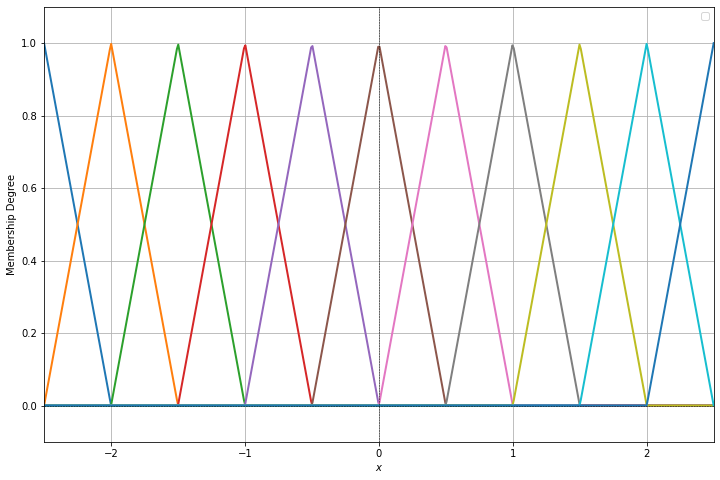

In [ ]:

a=-3 # Starting point
n = 11 # Number of triangular fuzzy sets
k = 0.5  # The distance between parameters

# Precompute the parameters for triangular fuzzy sets
params = [(a + (i - 1) * k, a + i * k, a + (i + 1) * k) for i in range(1, n + 1)]


# Plotting all fuzzy sets
luf.plot_triangular_fuzzy_sets(params)

Now, we will define Gaussian fuzzy sets and use them  to compute the inverse downward transformation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


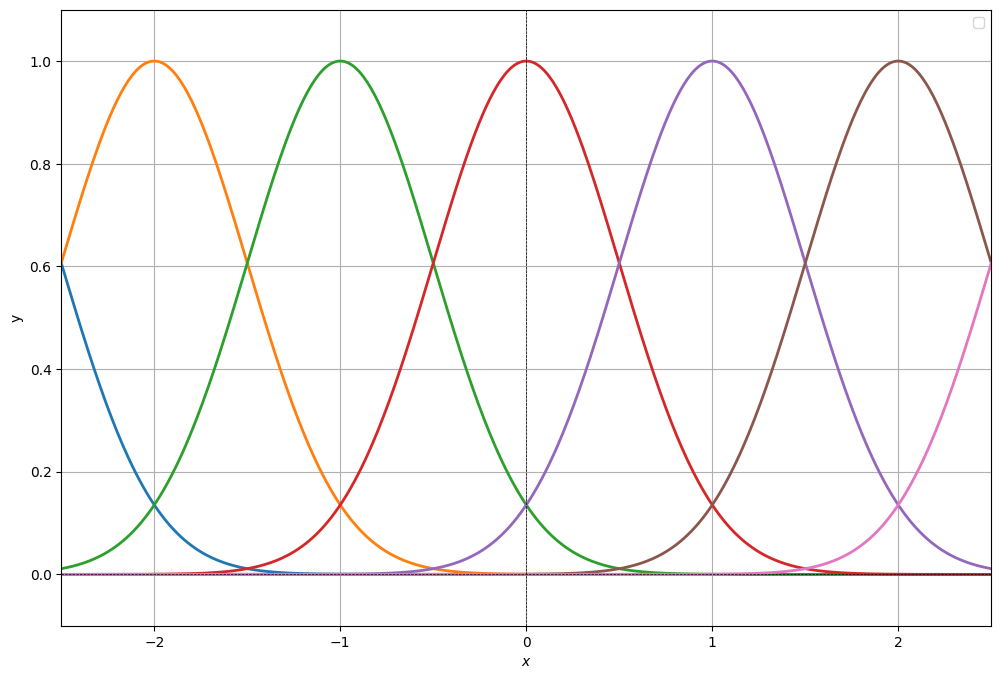

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Number of Gaussian fuzzy sets
n = 7  # Change this value as needed
sigma = 0.5  # Standard deviation for Gaussian sets

# Precompute the centers for Gaussian fuzzy sets
centers = np.linspace(-3, 3, n)  # Centers evenly spaced between -2 and 2


# Plotting all Gaussian fuzzy sets
luf.plot_gaussian_fuzzy_sets(centers, sigma)
# Save plot as PDF


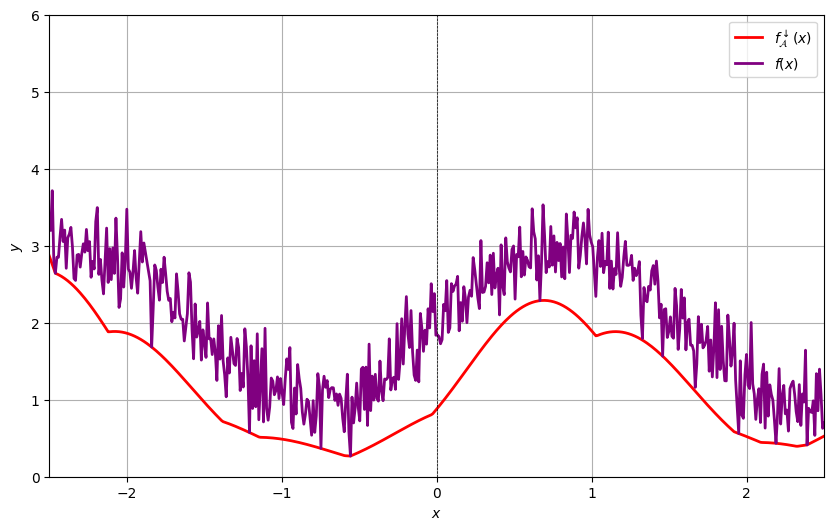

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x, noise_level=0.3):
    noise = np.random.normal(0, noise_level, size=x.shape)  # Add Gaussian noise
    return np.sin(2*x) + 2+noise

# Number of Gaussian fuzzy sets
n = 14  # Change this value as needed
sigma = 0.5  # Standard deviation for Gaussian sets
# Define the range of x values
x_values = np.linspace(-2.5, 2.5, 500)
f_x_values = f(x_values)  # Precompute f(x) values

# Precompute the centers for Gaussian fuzzy sets
centers = np.linspace(-3, 3, n)  # Centers evenly spaced between -2 and 2

# Compute F_A^\downarrow for each Gaussian fuzzy set
F_A_down = []

# Compute F_A^\downarrow
for c in centers:
    ratios = np.array([f_x_values[i] / luf.gaussian_fuzzy_set(x_values[i], sigma, c) if luf.gaussian_fuzzy_set(x_values[i], sigma, c) > 0 else np.inf 
                       for i in range(len(x_values))])
    F_A_down.append(np.min(ratios))


# Compute f_{\mathcal{A}}^\downarrow
f_A_down_values = np.array([luf.f_A_downG(x) for x in x_values])

# Plotting the result
plt.figure(figsize=(10, 6))
plt.plot(x_values, f_A_down_values, label='$f_{\\mathcal{A}}^{\\downarrow}(x)$', color='red', linewidth=2)
plt.plot(x_values, f_x_values, label='$f(x)$', color='purple', linewidth=2)
#plt.title('Inverse Downward Transformation with Gaussian Fuzzy Sets')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid()
plt.legend()
plt.xlim(-2.5, 2.5)
plt.ylim(0, 6)
plt.show()


Upper functions for gaussian fuzzy sets

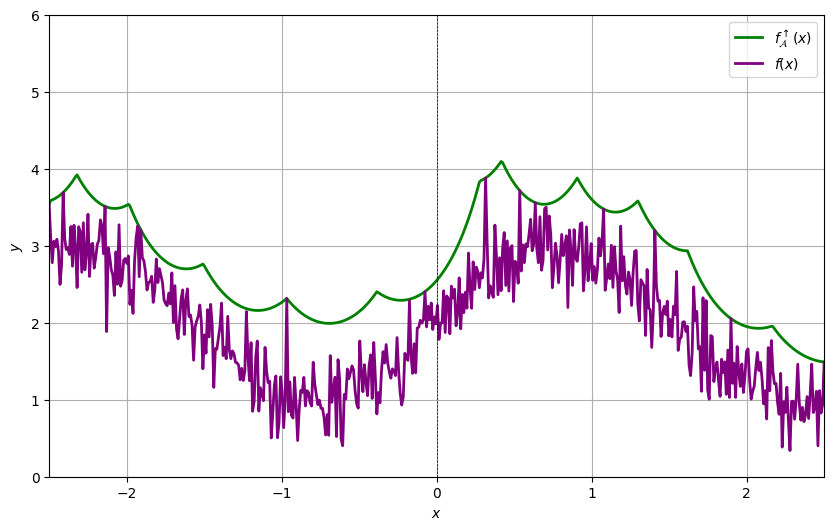

In [15]:

# Number of Gaussian fuzzy sets
n = 14  # Change this value as needed
sigma = 0.5  # Standard deviation for Gaussian sets

# Precompute the centers for Gaussian fuzzy sets
centers = np.linspace(-3, 3, n)  # Centers evenly spaced between -2 and 2

# Define the range of x values
x_values = np.linspace(-2.5, 2.5, 500)
f_x_values = f(x_values)  # Precompute f(x) values

# Compute F_A^\uparrow for each Gaussian fuzzy set
F_A_up = []

# Compute F_A^\uparrow
for c in centers:
    products = np.array([luf.gaussian_fuzzy_set(x, sigma, c) * f_x for x, f_x in zip(x_values, f_x_values)])
    F_A_up.append(np.max(products))


# Compute f_{\mathcal{A}}^\uparrow
f_A_up_values = np.array([luf.f_A_upG(x) for x in x_values])

# Plotting the result
plt.figure(figsize=(10, 6))
plt.plot(x_values, f_A_up_values, label='$f_{\\mathcal{A}}^{\\uparrow}(x)$', color='green', linewidth=2)
plt.plot(x_values, f_x_values, label='$f(x) $', color='purple', linewidth=2)
#plt.title('Inverse Upward Transformation with Gaussian Fuzzy Sets')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid()
plt.legend()
plt.xlim(-2.5, 2.5)
plt.ylim(0,6 )
plt.show()


Bell shaped MF

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


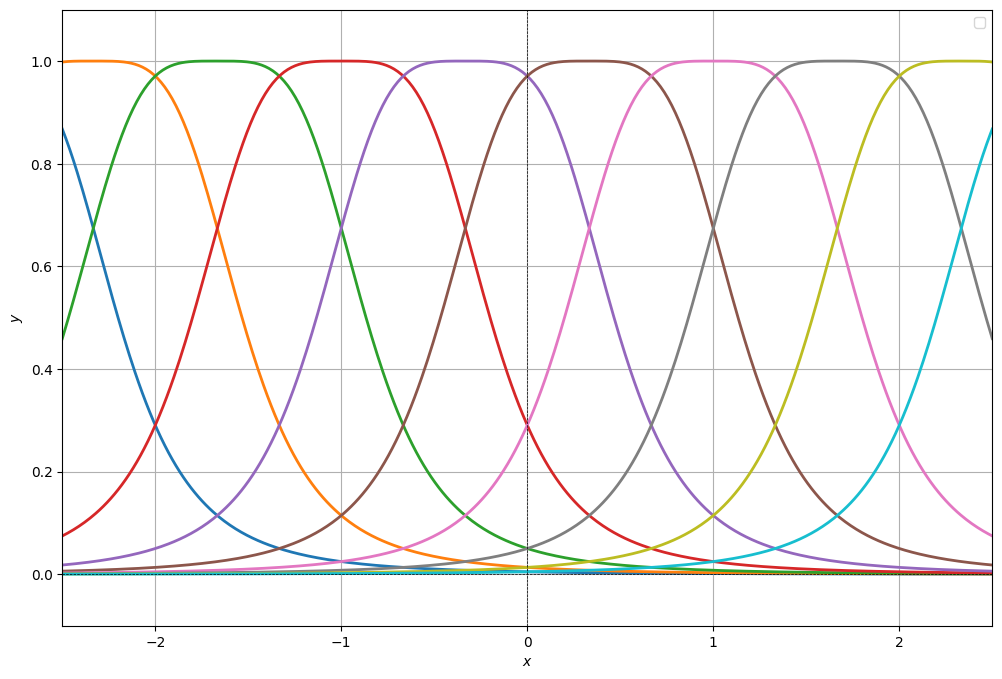

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Number of bell functions
n = 10  # Change this value as needed
a = 0.8  # Parameter for the bell function width
b = 2.0  # Parameter for the bell function shape

# Precompute the centers for bell functions
centers = np.linspace(-3, 3, n)  # Centers evenly spaced between -2 and 2

# Define the range of x values
x_values = np.linspace(-2.5, 2.5, 500)

# Plotting all Bell fuzzy sets
luf.plot_bell_fuzzy_sets(centers, a,b)

Lower functions for bell shape MF

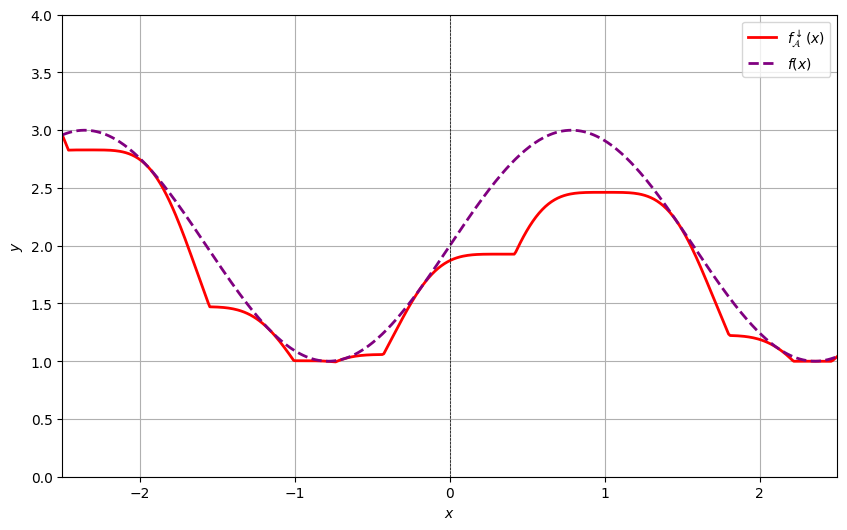

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the generalized bell function
def bell_function(x, a, b, c):
    return 1 / (1 + (np.abs((x - c) / a) ** (2 * b)))

# Define the function f(x)
def f(x):
    return np.sin(2*x) +2

# Number of bell functions
n = 10  # Change this value as needed
a = 0.8  # Parameter for the bell function width
b = 2.0  # Parameter for the bell function shape

# Precompute the centers for bell functions
centers = np.linspace(-3, 3, n)  # Centers evenly spaced between -2 and 2

# Define the range of x values
x_values = np.linspace(-2.5, 2.5, 500)
f_x_values = f(x_values)  # Precompute f(x) values

# Compute F_A^\downarrow for each generalized bell function
F_A_down = []

# Compute F_A^\downarrow
for c in centers:
    ratios = np.array([f_x / bell_function(x, a, b, c) if bell_function(x, a, b, c) > 0 else np.inf for x, f_x in zip(x_values, f_x_values)])
    F_A_down.append(np.min(ratios))

# Compute f_{\mathcal{A}}^\downarrow
f_A_down_values = np.array([luf.f_A_downB(x) for x in x_values])

# Plotting the result
plt.figure(figsize=(10, 6))
plt.plot(x_values, f_A_down_values, label='$f_{\\mathcal{A}}^{\\downarrow}(x)$', color='red', linewidth=2)
plt.plot(x_values, f_x_values, label='$f(x)$', color='purple', linewidth=2, ls='--')
#plt.title('Inverse Downward Transformation with Generalized Bell Functions')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid()
plt.legend()
plt.xlim(-2.5, 2.5)
plt.ylim(0, 4)
plt.show()


Upper functions with bell shaped MF

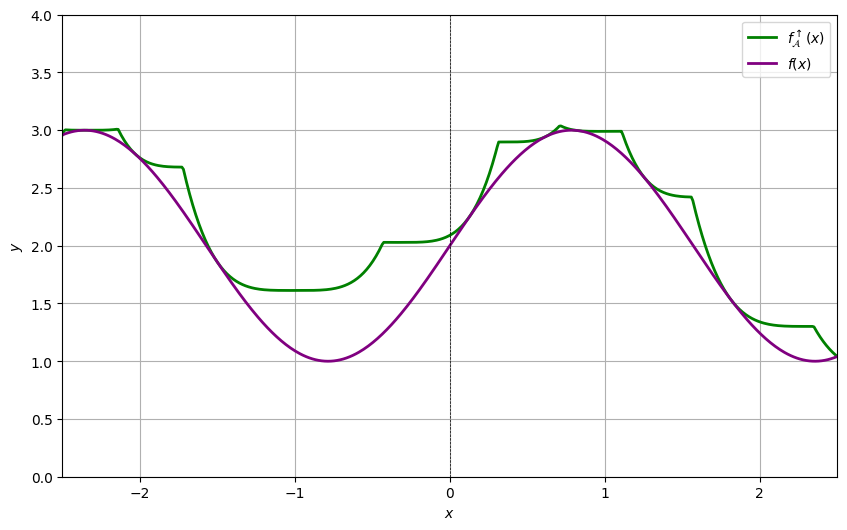

In [18]:
import numpy as np
import matplotlib.pyplot as plt


# Define the function f(x)
def f(x):
    return np.sin(2*x)+ 2

# Number of bell functions
n = 10  # Change this value as needed
a = 0.8  # Parameter for the bell function width
b = 2.0  # Parameter for the bell function shape

# Precompute the centers for bell functions
centers = np.linspace(-3, 3, n)  # Centers evenly spaced between -2 and 2

# Define the range of x values
x_values = np.linspace(-2.5, 2.5, 500)
f_x_values = f(x_values)  # Precompute f(x) values

# Compute F_A^\uparrow for each generalized bell function
F_A_up = []

# Compute F_A^\uparrow
for c in centers:
    products = np.array([bell_function(x, a, b, c) * f_x for x, f_x in zip(x_values, f_x_values)])
    F_A_up.append(np.max(products))


# Compute f_{\mathcal{A}}^\uparrow
f_A_up_values = np.array([luf.f_A_upB(x) for x in x_values])

# Plotting the result
plt.figure(figsize=(10, 6))
plt.plot(x_values, f_A_up_values, label='$f_{\\mathcal{A}}^{\\uparrow}(x)$', color='green', linewidth=2)
plt.plot(x_values, f_x_values, label='$f(x)$', color='purple', linewidth=2)
#plt.title('Inverse Upward Transformation with Generalized Bell Functions')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid()
plt.legend()
plt.xlim(-2.5, 2.5)
plt.ylim(0, 4)
plt.show()
